## Image (Face) Classification System

The dataset for this project is Cropped Yale Face dataset which is an open dataset. There are multiple folders inside theextracted zip folder. Each of these folders is associated with a single person and contains multiple pictures of that person. There are 38 unique human faces with upto 64 images per person in the dataset. 

Therefore, the dataset is a high dimensional data. To tackle this <b> Curse of Dimensionality </b>, we perform Dimensionality Reduction process.  

For this project, I have chosen the technique of Principal Component Analysis(PCA). This is because PCA takes advantage of the eigen vectors/eigen values to selectively identify the important features that completely represent the image. 

Therefore, as a first step, we are going to find out the Eigen Faces. 


### Eigen Faces
Here is a step-by-step process followed in order to find the Eigen Faces.
1. Construct a Data Matrix D
2. Find a mean face
3. Demean the data matrix
4. Run PCA on the obtained matrix to identify the eigen faces.


#### Data Matrix Construction
For obtaining the data matrix D,
1. Load the dataset in the language of your choice in grayscale format
2. Convert each image into a vector in row- major format
3. Stack up these vectors horizontally into a matrix D. If the width and height of each image are W and H respectively and the total number of images is N, the size of D is N x (W x H).
4. The label for each datapoint is the person's identity, stored into an N-dimensional vector y where $$ y_{i} \ \epsilon \ \{1,,,, 38\} $$.

In [3]:
## libraries needed
from PIL import Image
import numpy as np
import pandas as pd
import glob

In [4]:
list_files = glob.glob("P:\\Spring_2018\\Machine Learning\\hw2\\hw2_data\\CroppedYale\\CroppedYale//*//*.png")
view_list = ['P00A+025E+00', 'P00A+110E+65', 'P00A-050E+00', 'P00A+035E+15', 'P00A+110E-20', 'P00A-050E-40', 'P00A+035E+40', 'P00A+120E+00', 'P00A-060E+20', 'P00A+000E+00', 'P00A+035E+65', 'P00A+130E+20', 'P00A-060E-20', 'P00A+000E+20', 'P00A+035E-20', 'P00A-005E+10', 'P00A-070E+00', 'P00A+000E+45', 'P00A+050E+00', 'P00A-005E-10', 'P00A-070E+45', 'P00A+000E+90', 'P00A+050E-40', 'P00A-010E+00', 'P00A-070E-35', 'P00A+000E-20', 'P00A+060E+20', 'P00A-010E-20', 'P00A-085E+20', 'P00A+000E-35', 'P00A+060E-20', 'P00A-015E+20', 'P00A-085E-20', 'P00A+005E+10', 'P00A+070E+00', 'P00A-020E+10', 'P00A-095E+00', 'P00A+005E-10', 'P00A+070E+45', 'P00A-020E-10', 'P00A-110E+15', 'P00A+010E+00', 'P00A+070E-35', 'P00A-020E-40', 'P00A-110E+40', 'P00A+010E-20', 'P00A+085E+20', 'P00A-025E+00', 'P00A-110E+65', 'P00A+015E+20', 'P00A+085E-20', 'P00A-035E+15', 'P00A-110E-20', 'P00A+020E+10', 'P00A+095E+00', 'P00A-035E+40', 'P00A-120E+00', 'P00A+020E-10', 'P00A+110E+15', 'P00A-035E+65', 'P00A-130E+20', 'P00A+020E-40', 'P00A+110E+40', 'P00A-035E-20']

In [5]:
## For convinience, we chose only a sample of images for each face
new = []
for i in range(0,len(list_files)):
    for j in range(0,len(view_list)):
        if(view_list[j] in list_files[i]):
            new.append(list_files[i])

In [6]:
## For getting the standard size of each image, assuming that all the images are of the same size
image = Image.open(new[0])
standard_size = image.size

In [7]:
labels = []
D = []
for i in range(len(new)):
    image = Image.open(new[i])
    ## Gray Scale Conversion
    image = image.convert('L')
    im = np.array(image)
    # Row-Major Format
    im = im.ravel(order='K')
    # Labels from the filename
    labels.append(int(list_files[i].split(".png")[0].split("CroppedYale")[2].split("\\")[1].replace('yaleB','')))
    D.append(im)
D = np.array(D)

In [8]:
D

array([[80, 80, 84, ..., 12, 12, 11],
       [94, 94, 96, ...,  6,  7,  8],
       [59, 66, 77, ...,  5,  7,  7],
       ...,
       [ 3,  3,  3, ...,  4,  0,  1],
       [ 4,  3,  3, ...,  3,  0,  1],
       [ 4,  4,  4, ...,  8,  0,  2]], dtype=uint8)

#### Mean Face
Inorder to find a mean face,
1. Average the rows of D
2. Reshape the resulting W X H vector mean into a W-width, H-height image
3. Display this mean image.

In [9]:
average_face_ini = np.mean(D,axis=0)
average_face_ini.shape
average_face_ini

array([61.28956089, 62.4084507 , 63.36164043, ..., 43.35418393,
       42.23860812, 41.61723281])

In [10]:
standard_size

(168, 192)

In [11]:
average_face = average_face_ini.reshape(192,168)

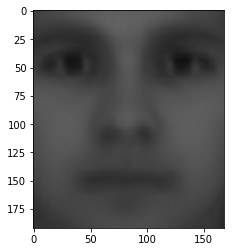

In [12]:
im =  Image.fromarray(average_face)
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(im)
plt.show()

#### Demean the data matrix
This means that subtract the mean from each row to ensure that the average value of any column of D is 0

In [13]:
fin = D - average_face_ini
a = np.mean(fin,axis=1)

In [14]:
# np.set_printoptions(suppress=True)
np.sum(fin)

3.761735570151359e-06

#### PCA Tranformation
Run PCA on the transformed data matrix D

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(fin)

In [16]:
len(principalComponents)

2414

A screeplot i.e. a plot 5 of the proportion of variance explained versus the principal component number is plotted below to help us find a heuristic on choosing the number of principal components to retain for dimensionality reduction. This can be seen as an elbow in the scree plot.

In [17]:
pca.explained_variance_ratio_[0]

0.3621586819590551

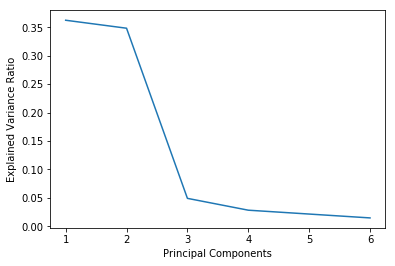

In [19]:
x = [1,2,3,4,6]
y = pca.explained_variance_ratio_[:5]
plt.plot(x,y)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

There is an elbow in the scree plot at 3rd principal component. This can give us an idea of choosing n components.

#### Plotting Eigen Faces
The first 10 principal components were plotted, again by reshaping each W X H-dimensional principal component into a W-width, H-height image. These principal components are nothing but the called eigenfaces. Let's call E as the matrix which stores the principal components as rows.

In [20]:
E= pca.components_[:10]
E.shape

(10, 32256)

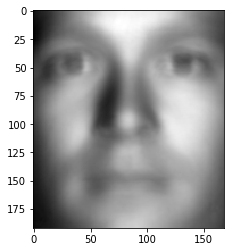

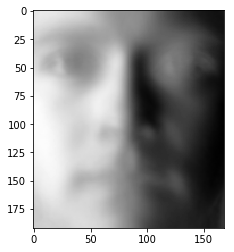

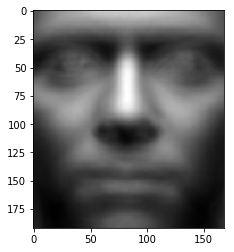

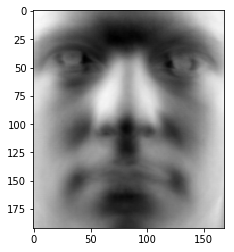

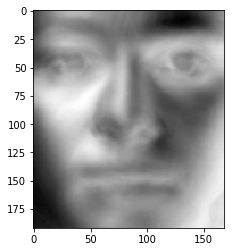

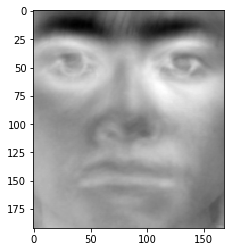

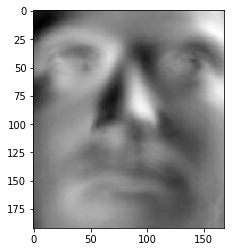

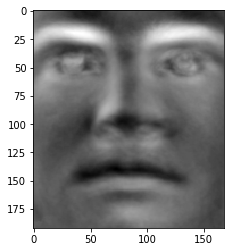

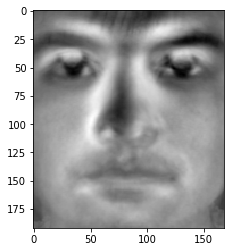

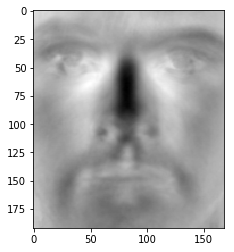

In [21]:
for i in range(len(E)):
    r = E[i].reshape(192,168)
    im =  Image.fromarray(r)
   
    plt.gray()
    plt.imshow(np.asarray(im))
    plt.show()

### Transformed Data
Reduced data is obtained by projecting the datapoints onto the principal components by matrix multiplication i.e 
$$ P = D \cdot E^{T} $$ This means that projections of a datapoint onto the principal components are obtained by taking the dot product of the datapoint with each of the principal components. The matrix multiplication just expresses this in a compact and computationally efficient format. 

Therefore, the ith row of P consists of principal component projections for the ith datapoint i.e. principal component scores that can be used to reconstruct the ith datapoint using the principal components in E. The jth column of P  captures the projection of datapoints onto the jth principal component. 

In [22]:
E = np.asmatrix(E)
D= np.asmatrix(D)

In [23]:
P = np.dot(D,E.T)
P.shape

(2414, 10)

Therefore, by applying PCA, we found out the reduced form for all the datapoints represented using the first 10 principal components.

### Building a classification system
Now,we will use decision trees to build a face classification system. This can be done using the original features as well as the features obtained from PCA-based dimensionality reduction P. The ith row in both matrices corresponds to the ith datapoint. The label for each datapoint is the person's identity  that was stored into an N-dimensional vector

For the purpose of cross-validation, we are splitting the data (D, P, and y) into 80% training data and 20% test data.

#### Fitting a decision tree model on original data

Initially, we are fitting a decision tree model using the training data D and y without any pruning, that is we are letting the tree grow until it's impossible to split (all records in data subset have the same output or the same set of input attributes). 

Use this model, y on test set is predicted. These predicted labels are evaluated against the true labels to compute the test error.

In [29]:
D = np.array(D)

In [30]:
from sklearn.model_selection import train_test_split
train_D, test_D, train_y, test_y = train_test_split(D, labels, test_size=0.2, random_state=0)
train_P,test_P,train_y_p,test_y_p = train_test_split(P,labels,test_size=0.2,random_state=0)

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_D, train_y)

In [32]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
n_nodes = clf.tree_.node_count

In [71]:
print(n_nodes)

751


In [72]:
print(clf.tree_.max_depth)

67


The number of terminal nodes (leaves) is observed to be 751 and the depth of the tree is observed to be 67.

In [73]:
pred = clf.predict(test_D)

In [74]:
from sklearn.metrics import accuracy_score

error_rate = 1 - accuracy_score(pred,test_y)
print('Error rate',error_rate)

Error rate 0.3995859213250518


In [75]:
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
#     node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True


In [76]:
num_leaves = 0
for i in range(len(is_leaves)):
    if(is_leaves[i] == True):
        num_leaves +=1
print('Number of leaf nodes',num_leaves)

Number of leaf nodes 376


The number of leaf nodes are 376

### Tree Pruning
Since the tree is a bit too large, pruning has to be done. Inorder to fit a pruned tree, the maximum depth hyperparameter is chosen using 10-fold cross-validation (CV). 

This pruned tree is evaluated on the test data on the basis of the test error.

In [35]:
values = np.arange(5,50,5)

In [ ]:
from sklearn.cross_validation import cross_val_score
cv_scs = {}
for i in values:
    clf = tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    cv_scs[i]= cross_val_score(clf, train_D, train_y, cv=5, n_jobs=-1)
    

The maximum depth hyperparameter versus the cross-validation error is plotted to find the optimal hyperparameter.

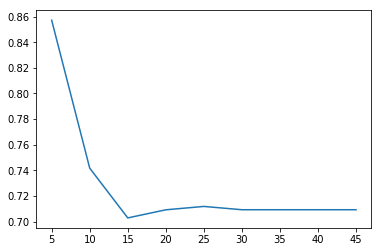

In [86]:
error_score=[]
for i in cv_scs.values():
    error_score.append(1-i)
plt.plot(cv_scs.keys(),error_score)
plt.show()

#### Fitting a decision tree model using the principal component training data P and y.

Initially, we are fitting a decision tree model using the training data P and y without any pruning, that is we are letting the tree grow until it's impossible to split (all records in data subset have the same output or the same set of input attributes).

Use this model, y on test set is predicted. These predicted labels are evaluated against the true labels to compute the test error.

In [78]:
from sklearn import tree
clf_n = tree.DecisionTreeClassifier()
clf_n = clf.fit(train_P, train_y_p)

In [79]:
clf_n

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
n_nodes_n = clf_n.tree_.node_count
n_nodes_n

1781

In [81]:
print(clf_n.tree_.max_depth)

29


In [82]:
pred_n = clf_n.predict(test_P)

In [83]:
from sklearn.metrics import accuracy_score
print("Error rate",1-accuracy_score(pred_n,test_y_p))

Error rate 0.6583850931677019


In [84]:
## taken from scikit learn tree package
children_left_n = clf_n.tree_.children_left
children_right_n = clf_n.tree_.children_right
is_leaves_n = np.zeros(shape=n_nodes_n, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id_n, parent_depth_n = stack.pop()
#     node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left_n[node_id_n] != children_right_n[node_id_n]):
        stack.append((children_left_n[node_id_n], parent_depth_n + 1))
        stack.append((children_right_n[node_id_n], parent_depth_n + 1))
    else:
        is_leaves_n[node_id_n] = True


In [85]:
num_leaves = 0
for i in range(len(is_leaves_n)):
    if(is_leaves_n[i] == True):
        num_leaves +=1
num_leaves

891

The number of terminal nodes are 1781. 
The maximum depth is 29. 
The number of leaf nodes are 891.

### Tree Pruning
Since the tree is a bit too large, pruning has to be done. Inorder to fit a pruned tree, the maximum depth hyperparameter is chosen using 10-fold cross-validation (CV). 

This pruned tree is evaluated on the test data on the basis of the test error.


In [83]:
from sklearn.cross_validation import cross_val_score
cv_scs_n = {}
for i in values:
    clf_n  = tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    cv_scs_n[i]= np.mean(cross_val_score(clf_n, train_P, train_y_p, cv=5, n_jobs=-1))

The maximum depth hyperparameter versus the cross-validation error is plotted to find the optimal hyperparameter.

In [84]:
error_score_n=[]
for i in cv_scs_n.values():
    error_score_n.append(1-i)
    

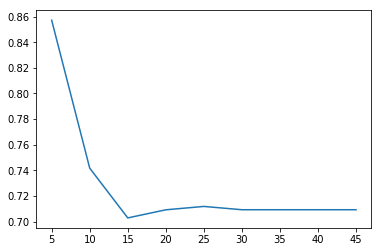

In [85]:
plt.plot(cv_scs_n.keys(),error_score_n)
plt.show()


### 2D Hyperparameter search
Now instead of tuning just the maximum tree depth, we perform 2D cross-validation on the training data P and y to tune two hyperparameters { (a) the maximum tree depth in decision tree training, and (b) the number of top principal components used as features. 

A heatmap where X-axis is the maximum tree depth hyperparameter, Y-axis is the number of top principal component features used is plotted. The heat value is the cross-validation error. The combination of hyperparameters that minimzes cross-validation error is computed using this heatmap.

The principal component projections of datapoints stored in P are ordered by explained variance. To use the top-k principal components as features, pick the first k columns of P and use it as the features.

In [33]:
num_features = np.arange(1,11,1)
num_features

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
from sklearn.cross_validation import cross_val_score
cv_scs_nn = {}
for i in values:
    for j in num_features:
        clf_n  = tree.DecisionTreeClassifier(max_depth=i,random_state=0)
        l = [k for k in range(1,j)]
        cv_scs_nn[str(i)+' '+str(j)]= np.mean(cross_val_score(clf_n, train_P[:,:j], train_y_p, cv=5, n_jobs=-1))
        

C:\Users\pooji\Anaconda3new\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
depth= []
comp = []
sc = []
for i in range(len(cv_scs_nn)):
    depth.append(int(list(cv_scs_nn.keys())[i].split()[0]))
    comp.append(int(list(cv_scs_nn.keys())[i].split()[1]))
    sc.append(1-list(cv_scs_nn.values())[i])

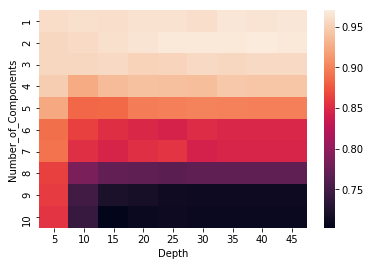

In [39]:
import seaborn as sns
df_d = pd.DataFrame()
df_d['Depth']=depth
df_d['Number_of_Components']=comp
df_d['Scores']= sc
data_pivoted = df_d.pivot( "Number_of_Components","Depth", "Scores")
ax = sns.heatmap(data_pivoted)
plt.show()

In [40]:
min_score=min(sc)
ind = sc.index(min_score)
print("The best depth",depth[ind])
print("The best num of components",comp[ind])

The best depth 15
The best num of components 10


#### Fitting a decision tree model using the above model

Using this optimal combination of hyperparameters that we have found, train the model using the entire training set. Using this model, predict y on test set and evaluate these predictions against the true labels y to compute the test error. 

In [94]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=depth[ind],random_state=0,criterion='entropy')
clf = clf.fit(train_D, train_y)

In [95]:
from sklearn.metrics import accuracy_score
best_pred = clf.predict(test_D)
1-accuracy_score(best_pred,test_y)

0.3913043478260869

The test error was almost 0.658 which has reduced to half almost half i.e 0.39 using the parameters obtained through 2-D Hyperparameter search. Clearly, the 2D hyperparameter search helped improve test error compared to the 1D hyperparameter search for maximum tree depth.

### Nested Cross-Validation Method
In small datasets such as the faces dataset here, it is preferable to be able to use all datapoints to calculate the test error to get a better estimate. This can be done through nested cross- validation

Split the entire dataset into K folds, where K x 1 folds are used for cross-validated training and the remaining fold is used as the test set. When we iterate through all the folds, we obtain a test error estimate for each fold. These are then used to compute a weighted average where each test error statistic is weighted by the number of test datapoints used to calculate it. This average is computed using all datapoints and is a much better (lower variance) estimate of true test error.

In [75]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
fold_count =0

weighted_scores = []
sublist = np.arange(12,19,3)
skf = KFold(n_splits=3, random_state=0)
for train_index, test_index in skf.split(P):
    result=[]
    fold_count = fold_count + 1
    X_train, X_test = P[train_index], P[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    for feature in sublist:
        clf= tree.DecisionTreeClassifier(max_depth=feature,random_state=0,criterion='entropy')
        result.append(1-np.mean(cross_val_score(clf, X_train, y_train, cv=3,verbose=1, n_jobs =-1)))
        
    min_error = min(result)
    c_ind = result.index(min_error)
    best_cv_hp = sublist[c_ind]
    
    clf= tree.DecisionTreeClassifier(max_depth=best_cv_hp,random_state=0,criterion='entropy')
    clf.fit(X_train,y_train)
    predic = clf.predict(X_test)
    fin_error = 1-clf.score(X_test,y_test)
    wscore = (fin_error*len(X_test))/len(X_train)
    weighted_scores.append(wscore)

    


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


In [80]:
print('Weighted Errors for each parameter',weighted_scores)

Weighted Errors for each parameter [0.4990677439403356, 0.4996892479801119, 0.49875776397515525]


In [81]:
best_parameter = sublist[weighted_scores.index(min(weighted_scores))]
print('Best paramter',best_parameter)

Best paramter 18


In the above code,the hyper parameter for the depth of the tree is tuned using nested cross validation technique. I have considered 3 folds in the data due to computational limits. There is a variation in the error computed earlier to the one computed through cross validation.